# Projet - Anayse de données industrielles 

## A ) Données d'urgence

Indicateurs observés :  
- le nombre total de visites, 
- le nombre de visites d’usagers de 75 ans et plus, 
- le nombre de visites d’usagers présentant des problématiques en santé mentale, 
- la durée moyenne de séjour (DMS), 
- le nombre d’usagers ayant été pris en charge (PEC) et le délai de PEC (délai entre la fin du 1er triage et la prise en charge médicale)

#### Overview des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import des données

In [2]:
path_data = r"Données Urgence\Donnees_cumulatives_Urgence.csv"

In [3]:
df = pd.read_csv(path_data)

Dimensions

In [4]:
print(f" Il y a {df.shape[0]} enregistrements, chacun contenant {df.shape[1]} caractéristiques")

 Il y a 795 enregistrements, chacun contenant 27 caractéristiques


Les attributs

In [5]:
print(df.columns)

Index(['annee', 'cumul_periode', 'rss', 'region', 'nom_etablissement',
       'nom_installation', 'no_permis_installation', 'nb_visites_total',
       'nb_usagers_75ans_et_plus_total', 'nb_usagers_sante_mentale_total',
       'dms_total', 'nb_usagers_pec_total', 'delai_pec_total',
       'nb_visites_ambulatoire', 'nb_usagers_75ans_et_plus_amb',
       'nb_usagers_sante_mentale_amb', 'dms_ambulatoire',
       'nb_usagers_pec_ambulatoire', 'delai_pec_ambulatoire',
       'nb_visites_sur_civiere', 'nb_usagers_sur_civiere_plus_24h',
       'nb_usagers_sur_civiere_plus_48h', 'dms_sur_civiere',
       'nb_usagers_pec_sur_civiere', 'delai_pec_sur_civiere',
       'nb_usagers_75ans_et_plus_civ', 'nb_usagers_sante_mentale_civ'],
      dtype='object')


Plages des valeurs

In [6]:
print(f"L'Intervalle d'année est [{min(df['annee'])}, {max(df['annee'])}]")
print(f"Les mesures ont été réalisé sur {len(set(df['region']))} régions") 
print(f"Les mesures ont été réalisé sur {len(set(df['nom_etablissement']))} établissements") 
print(f"Les mesures ont été réalisé sur {len(set(df['nom_installation']))} installations") 

L'Intervalle d'année est [2020-2021, 2024-2025]
Les mesures ont été réalisé sur 16 régions
Les mesures ont été réalisé sur 30 établissements
Les mesures ont été réalisé sur 118 installations


### 1 - Analyse des durées moyennes de séjour (DMS) 

Questions : 
- Il y a t'il une évolution au fil du temps des DMS globalement/localement ?
- Il y a t'il des régions/établissements avec des DMS très élevés ?
- Le DMS est-il affecté par le type d'usagers (age, santé mentale) et le type de prise en charge (civière, ambulatoire)

#####  Il y a t'il une évolution au fil du temps des DMS globalement/localement ?

Globalement

In [7]:
dms_total = df[(df['region'] == "Total provincial")]

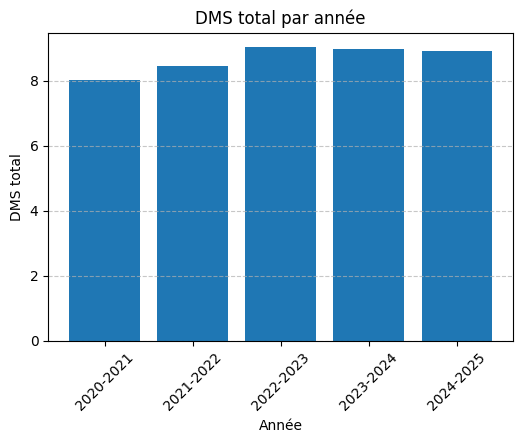

In [8]:
plt.figure(figsize=(6, 4))
plt.bar(dms_total['annee'], dms_total['dms_total'])
plt.xlabel("Année")
plt.ylabel("DMS total")
plt.title("DMS total par année")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Globalement, après une période d'augmentation en 2020 et 2023, on observe une légère diminution depuis.

Localement

IndexError: index 15 is out of bounds for axis 0 with size 15

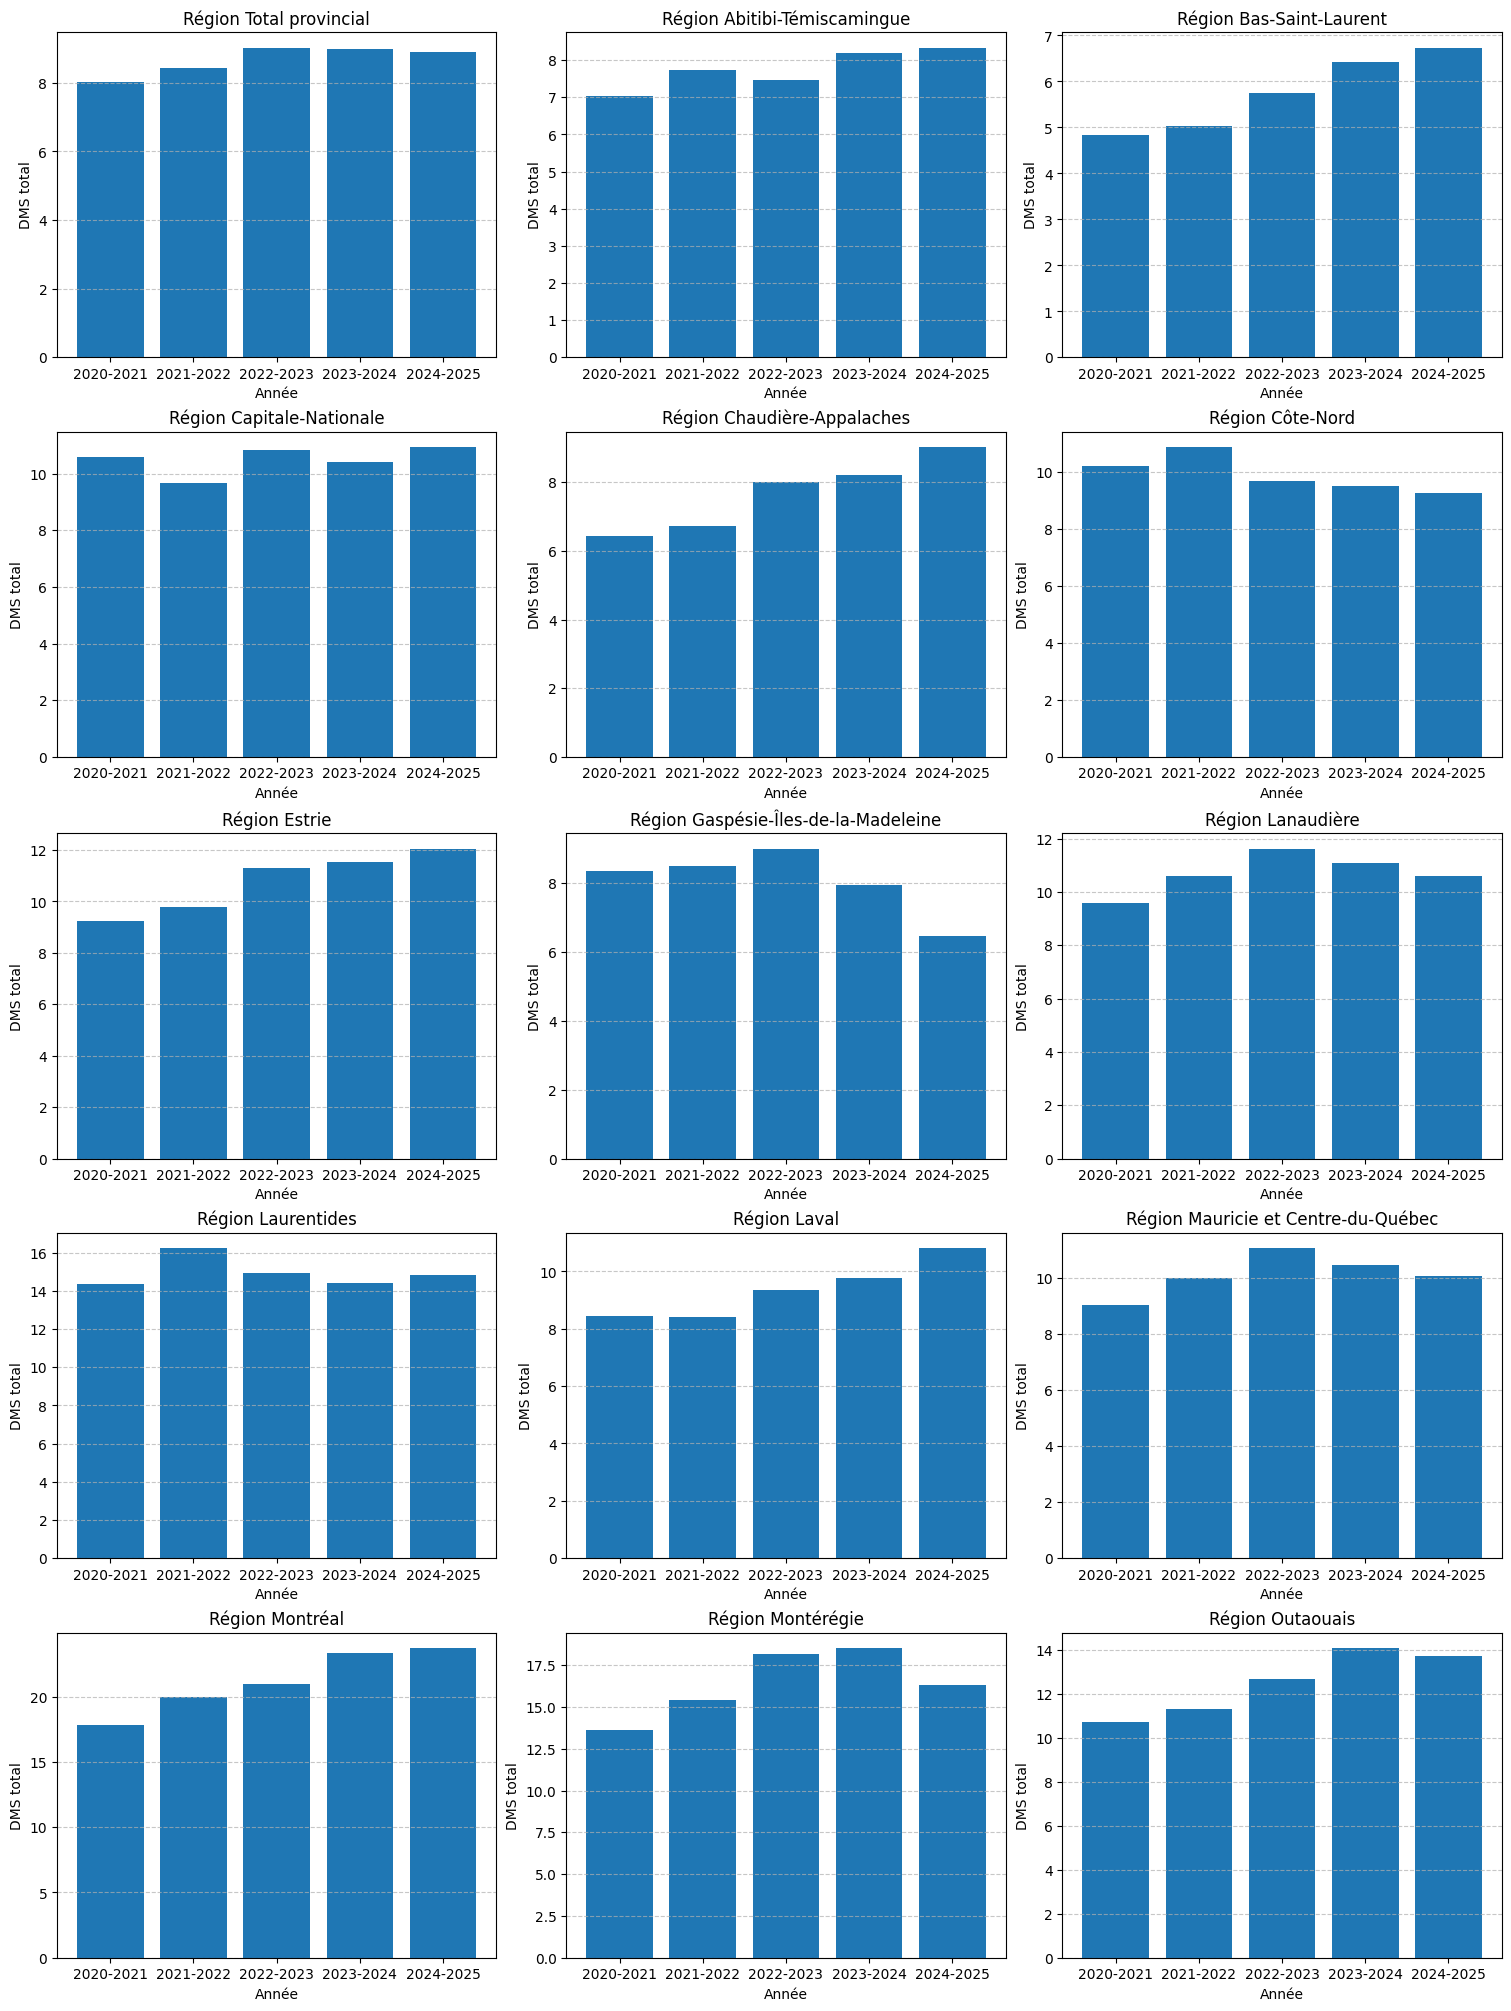

In [10]:
regions = df['region'].unique()  # Liste des régions uniques
num_regions = len(regions)       # Nombre de régions

rows, cols = 5, 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 20), constrained_layout=True)

axes = axes.flatten()


for i, region in enumerate(regions):
    region_data = df[df['region'] == region]
    axes[i].bar(region_data['annee'], region_data['dms_total'])
    axes[i].set_title(f"Région {region}")
    axes[i].set_xlabel("Année")
    axes[i].set_ylabel("DMS total")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
if num_regions < len(axes):
    for i in range(num_regions, len(axes)):
        fig.delaxes(axes[i])

plt.show()

On observe 3 cas de figures (liste non exhaustive) :

- Une augmentation depuis 2020 : Montréal, Est, Cha , Bas
- Une diminution récente : Mau, Out, Gas, Côt 
- Stagnation : Cap, Sag, Tot

Peut-on expliquer les augmentations et diminutions selon les autres attributs ?

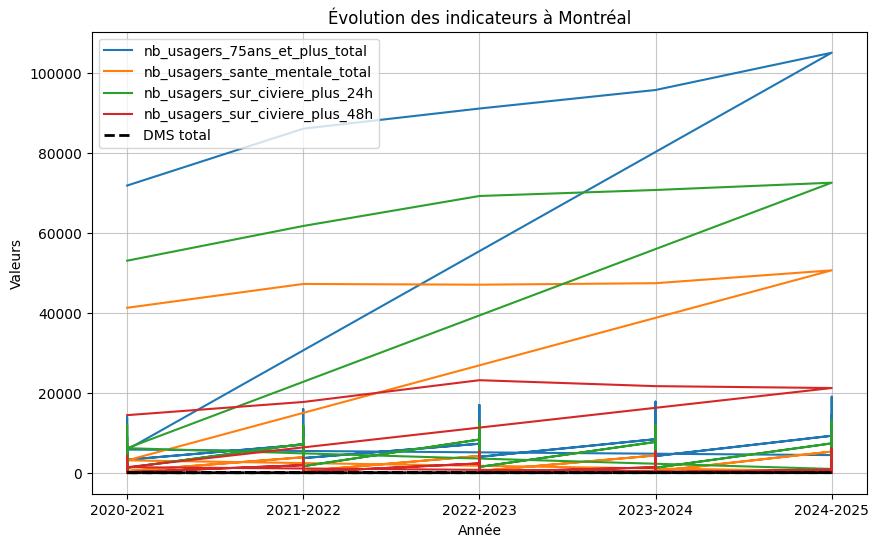

In [17]:
# To-do
region_analyse = "Montréal"  # Exemple avec Montréal
data_region = df[df['region'] == region_analyse]
attributes_to_analyze = ['nb_usagers_75ans_et_plus_total', 'nb_usagers_sante_mentale_total', 'nb_usagers_sur_civiere_plus_24h', 'nb_usagers_sur_civiere_plus_48h']

plt.figure(figsize=(10, 6))
for attr in attributes_to_analyze:
    plt.plot(data_region['annee'], data_region[attr], label=attr)
    

plt.plot(data_region['annee'], data_region['dms_total'], label='DMS total', linestyle='--', linewidth=2, color='black')
plt.xlabel("Année")
plt.ylabel("Valeurs")
plt.title(f"Évolution des indicateurs à {region_analyse}")
plt.legend()
plt.grid(alpha=0.7)
plt.show()

In [ ]:
# To-do filtrer les valeurs abérrantes 

##### Il y a t'il des régions/établissements avec des DMS très élevés ?

In [14]:
#Pré-traîtrement, pour lire les régions sur un graphe
df["region"] = df["region"].apply(lambda x: x[:3])

In [15]:
dms_region = df.groupby('region')['dms_total'].sum().reset_index()


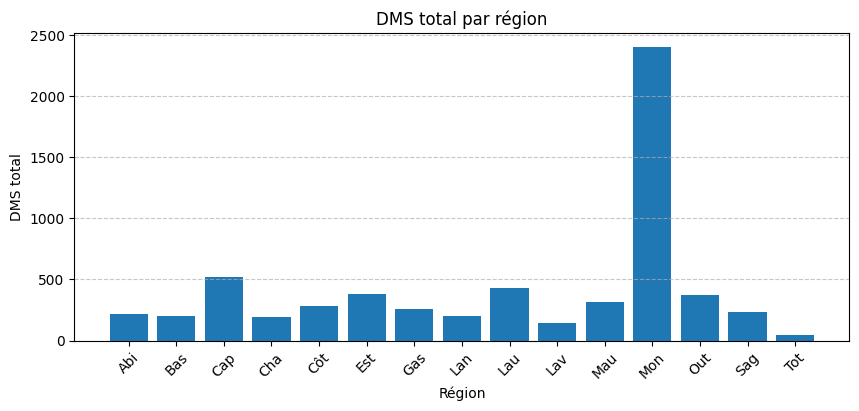

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(df['region'], df['dms_total'])
plt.xlabel("Région")
plt.ylabel("DMS total")
plt.title("DMS total par région")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

On remarque que Montréal possède une durée moyenne bien supérieur aux autres.

Peut-on expliquer cette différence ?


In [13]:
# To-do


#####  Le DMS est-il affecté par le type d'usagers (age, santé mentale) et le type de prise en charge (civière, ambulatoire)

Crée une matrice de corrélation 

In [26]:
print(df.columns)

Index(['annee', 'cumul_periode', 'rss', 'region', 'nom_etablissement',
       'nom_installation', 'no_permis_installation', 'nb_visites_total',
       'nb_usagers_75ans_et_plus_total', 'nb_usagers_sante_mentale_total',
       'dms_total', 'nb_usagers_pec_total', 'delai_pec_total',
       'nb_visites_ambulatoire', 'nb_usagers_75ans_et_plus_amb',
       'nb_usagers_sante_mentale_amb', 'dms_ambulatoire',
       'nb_usagers_pec_ambulatoire', 'delai_pec_ambulatoire',
       'nb_visites_sur_civiere', 'nb_usagers_sur_civiere_plus_24h',
       'nb_usagers_sur_civiere_plus_48h', 'dms_sur_civiere',
       'nb_usagers_pec_sur_civiere', 'delai_pec_sur_civiere',
       'nb_usagers_75ans_et_plus_civ', 'nb_usagers_sante_mentale_civ'],
      dtype='object')


In [36]:
colonnes_a_garder = ['nb_usagers_75ans_et_plus_total', 'nb_usagers_sante_mentale_total', 'nb_visites_ambulatoire','nb_visites_sur_civiere','nb_usagers_pec_sur_civiere','nb_usagers_pec_ambulatoire','nb_usagers_sur_civiere_plus_24h','nb_usagers_sur_civiere_plus_48h','delai_pec_total','dms_total']  # Liste des colonnes à conserver
sdf = df[colonnes_a_garder]


In [37]:
correlation_matrix = sdf.corr()

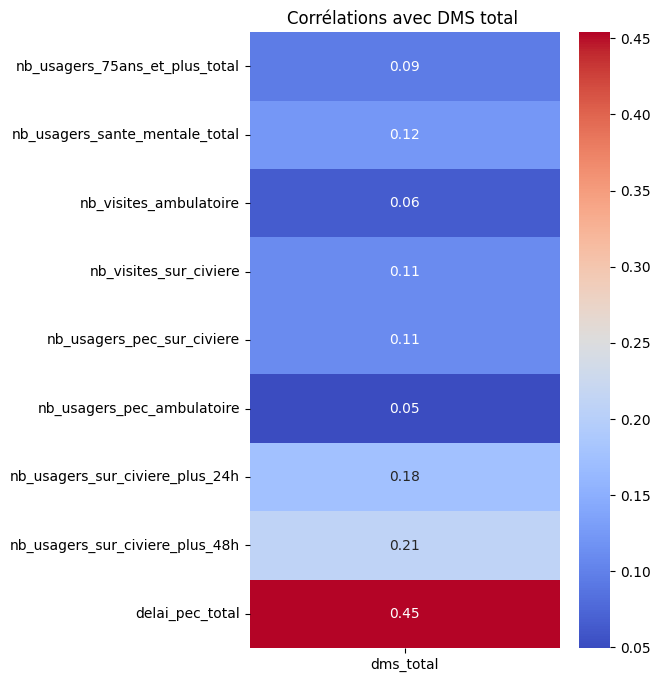

In [38]:
correlation_dms = correlation_matrix[['dms_total']].drop('dms_total')

plt.figure(figsize=(5, 8))
sns.heatmap(correlation_dms, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Corrélations avec DMS total ")
plt.show()


On observe une forte corrélation entre la durée de séjours moyen et le nb de passagers sur civières restant plus de 24h, 48h (et le nb de usagers sur civière), le délai d'attente et le nombre d'usager en service santé mentale. 

### 2 - Analyse des délais (PEC)

Questions : 
- Il y a t'il des régions/établissements avec des PEC très élevés ?
- Il y a t'il une évolution au fil du temps des PEC globalement/localement ?
- Le PEC est-il affecté par le type d'usagers (age, santé mentale) et le type de prise en charge (civière, ambulatoire) ?

### 3 - Prédiction des délais et durées 

In [ ]:
#To-do
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Variables explicatives et cible
X = df[['nb_usagers_75ans_et_plus_total', 'nb_usagers_sante_mentale_total', 'nb_visites_ambulatoire', 'nb_visites_sur_civiere']]
y = df['delai_pec_total']

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de prédiction
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Performance du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")